In [7]:
import gymnasium as gym
import matplotlib.pyplot as plt

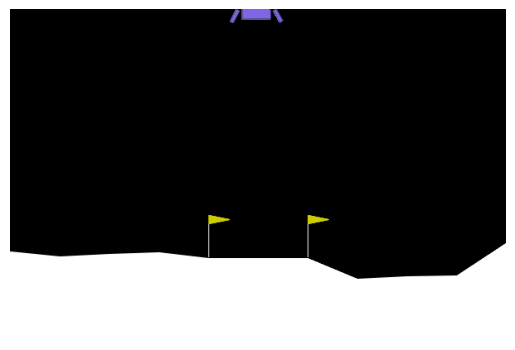

(400, 600, 3)


NameError: name 'state' is not defined

In [8]:
env = gym.make("LunarLander-v3", render_mode = "rgb_array")
env.reset()
frame = env.render()
plt.imshow(frame)
plt.axis('off')
plt.show()

env.close()
print(frame.shape)
print(state)

0
False


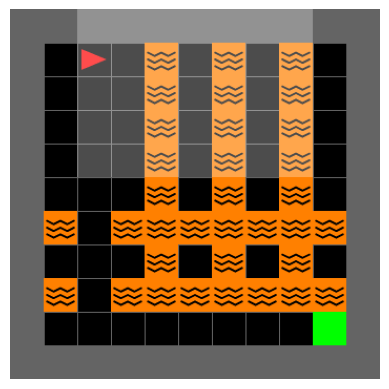

(7, 7, 3)


In [ ]:
import gymnasium as gym
import minigrid
import matplotlib.pyplot as plt
from minigrid.wrappers import RGBImgPartialObsWrapper, ImgObsWrapper


env = gym.make("MiniGrid-LavaCrossingS11N5-v0", render_mode = 'rgb_array')

state, _ = env.reset()
next_state, reward, done, info, _ = env.step(2)
print(reward)
print(info)
frame = env.render()
plt.imshow(frame)
plt.axis('off') 
plt.show()
print(state['image'].shape)


In [ ]:
import gymnasium as gym
from minigrid.wrappers import FlatObsWrapper, RGBImgPartialObsWrapper, ImgObsWrapper
import torch.nn as nn

env = gym.make('MiniGrid-Empty-8x8-v0')
env = FlatObsWrapper(env)
# env = RGBImgPartialObsWrapper(env) # Get pixel observations
# env = ImgObsWrapper(env) # Get rid of the 'mission' field
obs, _ = env.reset() # This now produces an RGB tensor only
print(obs)




[2 5 0 ... 0 0 0]


In [ ]:
class MinigridFeaturesExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space: gym.Space, features_dim: int = 512, normalized_image: bool = False) -> None:
        super().__init__(observation_space, features_dim)
        n_input_channels = observation_space.shape[0]
        self.cnn = nn.Sequential(
            nn.Conv2d(n_input_channels, 16, (2, 2)),
            nn.ReLU(),
            nn.Conv2d(16, 32, (2, 2)),
            nn.ReLU(),
            nn.Conv2d(32, 64, (2, 2)),
            nn.ReLU(),
            nn.Flatten(),
        )

        # Compute shape by doing one forward pass
        with torch.no_grad():
            n_flatten = self.cnn(torch.as_tensor(observation_space.sample()[None]).float()).shape[1]

        self.linear = nn.Sequential(nn.Linear(n_flatten, features_dim), nn.ReLU())

    def forward(self, observations: torch.Tensor) -> torch.Tensor:
        return self.linear(self.cnn(observations))